In [1]:
import numpy as np
import control as ct
import matplotlib.pyplot as plt

## Question 1

Settling time:
$$
T_{s} = \frac{4}{\alpha} = 2 \\
\alpha = 2
$$
Stability margin:
$$
M_{s} = \frac{\alpha^2 + \beta^2}{2\alpha\beta}\\
\alpha = \beta(1.2 \pm \sqrt{1.2^2-1})\\
\alpha = 1.86\beta\\\alpha = 0.54\beta\\\alpha > \beta$$
results in no resonance peak so choose 
$$\alpha = 0.54\beta\\\beta = 3.7$$


## Question 2

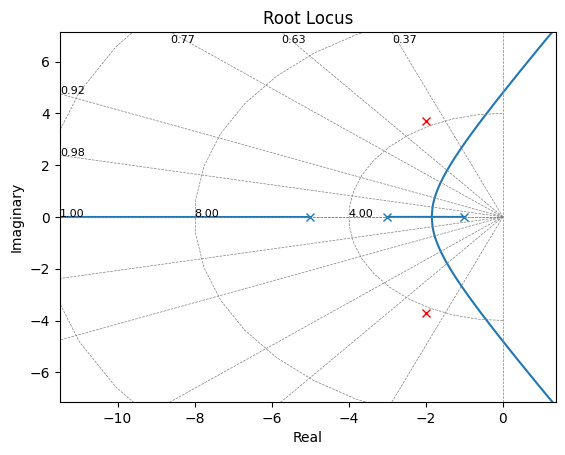

In [2]:
P = ct.tf(1,[1, 9, 23, 15])
desired_cl_poles_alpha = 2
desired_cl_poles_beta = 3.7
desired_cl_poles = complex(desired_cl_poles_alpha, desired_cl_poles_beta)
fig,ax = plt.subplots(1)
cl_poles, gain = ct.root_locus(P)
ax.plot(-np.real(desired_cl_poles), np.imag(desired_cl_poles), 'rx')
ax.plot(-np.real(desired_cl_poles), -np.imag(desired_cl_poles), 'rx')

## Question 3

Place poles at:
$$
-2 \pm 3.7j
$$
Calculate phase at -2 + 3.7j
$$
(s+1): -2 + 3.7j + 1 = -1 + 3.7j = 3.83 | 105\\
(s+3): -2 + 3.7j + 3 = 1 + 3.7j = 3.83 | 75\\
(s+5): -2 + 3.7j + 5 = 3 + 3.7j = 4.76 | 51\\
-105-75-51 = -231
$$
Need to add 51 degrees to get -180

### Design 1
Add a zero at (s+5)  
With the zero, 51-105-75-51 = -180
$$
|K_{ld}(s+5)\frac{1}{(s+1)(s+3)(s+5)}|_{s = -2+3.7j} = 1\\
|K_{ld}(4.76)\frac{1}{(3.83)(3.83)(4.76)}| = 1\\
0.068K_{ld} = 1\\
K_{ld} = 14.67\\
K_{1} = 14.67(s+5)\\
K_{1}= 14.67s+73.34
$$

### Design 2
Add a zero at (s+1) and a pole at (s+4.6882)
$$
(s+4.6882): -2 + 3.7j + 4.6882 = 2.6882 + 3.7j = 4.57 | 54
$$
With the pole and the zero, 105-105-75-51-54 = -180
$$
|K_{ld}\frac{(s+1)}{(s+4.6882)}\frac{1}{(s+1)(s+3)(s+5)}|_{s = -2+3.7j} = 1\\
|K_{ld}\frac{(3.83)}{(4.57)}\frac{1}{(3.83)(3.83)(4.76)}| = 1\\
0.012K_{ld} = 1\\
K_{ld} = 83.3\\
K_{2} = 83.3\frac{s+1}{s+4.6882}\\
K_{2}= \frac{83.3s+83.3}{s+4.6882}
$$

## Question 4

(-20.0, 20.0)

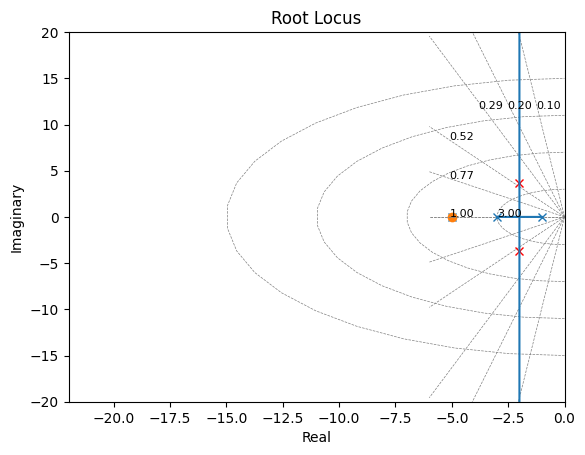

In [3]:
K1 = ct.tf([14.67, 73.34], 1) # enter your design here
L1 = P*K1
fig,ax = plt.subplots(1)
cl_poles, gain = ct.root_locus(L1)
ax.plot(-np.real(desired_cl_poles), np.imag(desired_cl_poles), 'rx')
ax.plot(-np.real(desired_cl_poles), -np.imag(desired_cl_poles), 'rx')
ax.set_xlim(-22,0)
ax.set_ylim(-20,20)

(-20.0, 20.0)

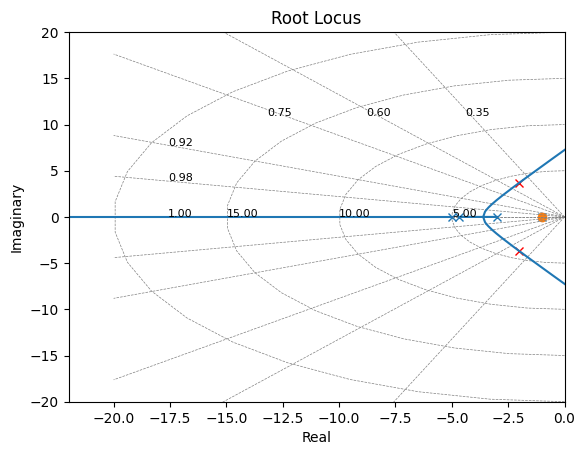

In [4]:
K2 = ct.tf([83.3, 83.3], [1, 4.6882]) # enter your design here
L2 = P*K2
fig,ax = plt.subplots(1)
cl_poles, gain = ct.root_locus(L2)
ax.plot(-np.real(desired_cl_poles), np.imag(desired_cl_poles), 'rx')
ax.plot(-np.real(desired_cl_poles), -np.imag(desired_cl_poles), 'rx')
ax.set_xlim(-22,0)
ax.set_ylim(-20,20)

## Question 5

Stability margin 1: 1.3957434862758895
Stability margin 2: 1.3299506868412732


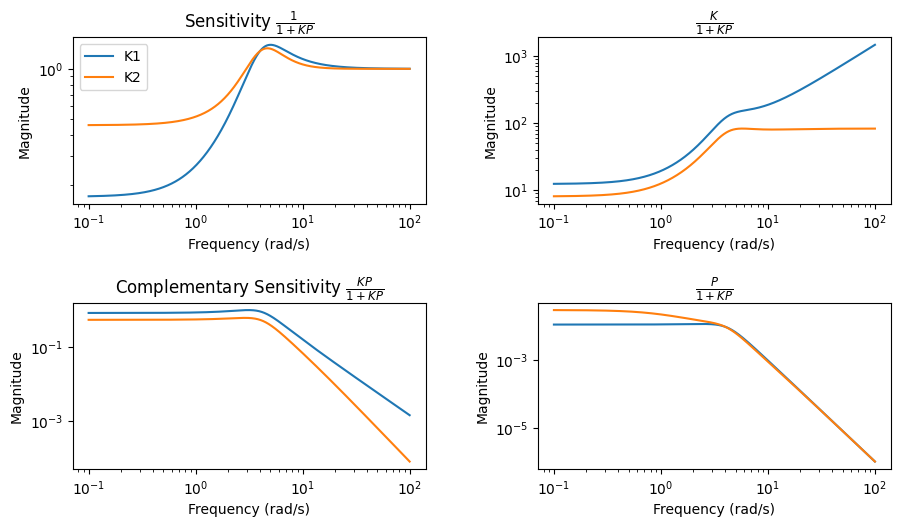

In [5]:
T1 = P*K1/(1+P*K1)
T2 = P*K2/(1+P*K2)
S1 = 1/(1+P*K1)
S2 = 1/(1+P*K2)
SK1 = K1*S1
SK2 = K2*S2
SP1 = P*S1
SP2 = P*S2
mag_S, phase_S, w_S = ct.bode_plot([S1,S2],plot=False)
mag_T, phase_T, w_T = ct.bode_plot([T1,T2],plot=False)
mag_SK, phase_SK, w_SK = ct.bode_plot([SK1,SK2],plot=False)
mag_SP, phase_SP, w_SP = ct.bode_plot([SP1,SP2],plot=False)
fig, ax = plt.subplots(2,2, figsize=(10,6))
fig.tight_layout(pad=5.0)
ax[0,0].loglog(w_S[0],mag_S[0], label='K1')
ax[0,0].loglog(w_S[1],mag_S[1], label='K2')
ax[0,0].set_title(r'Sensitivity $\frac{1}{1+KP}$')
ax[0,0].legend()
ax[0,0].set_xlabel('Frequency (rad/s)')
ax[0,0].set_ylabel('Magnitude')
ax[1,0].loglog(w_T[0],mag_T[0])
ax[1,0].loglog(w_T[1],mag_T[1])
ax[1,0].set_title(r'Complementary Sensitivity $\frac{KP}{1+KP}$')
ax[1,0].set_xlabel('Frequency (rad/s)')
ax[1,0].set_ylabel('Magnitude')
ax[0,1].loglog(w_SK[0],mag_SK[0])
ax[0,1].loglog(w_SK[1],mag_SK[1])
ax[0,1].set_title(r'$\frac{K}{1+KP}$')
ax[0,1].set_xlabel('Frequency (rad/s)')
ax[0,1].set_ylabel('Magnitude')
ax[1,1].loglog(w_SP[0],mag_SP[0])
ax[1,1].loglog(w_SP[1],mag_SP[1])
ax[1,1].set_title(r'$\frac{P}{1+KP}$')
ax[1,1].set_xlabel('Frequency (rad/s)')
ax[1,1].set_ylabel('Magnitude')

mag_S1, phase_S, w_S = ct.bode_plot([S1],plot=False)
mag_S2, phase_S, w_S = ct.bode_plot([S2],plot=False)
Ms1 = np.max(mag_S1)
Ms2 = np.max(mag_S2)
print( 'Stability margin 1:', Ms1)
print( 'Stability margin 2:', Ms2)

With the added lines of code, we can find that neither design quite matches the robustness requirement with design 1 having a stability margin of 1.4 while design 2 has one of 1.33. However, they are close to the expected value of 1.2 so it may have been an error due to rounding at some point during the calculations.
- K1:
    - K1 seems to be slightly less robust than K2
    - K1 is better at tracking references in the frequency range of (0-2) rad/s
    - Worse noise rejection
    - Higher plant input required
    - Better disturbance rejection

- K2:
    - Slightly more robust than K1
    - Worse at tracking references in the frequency range of (0-2) rad/s
    - Better noise rejection
    - Lower plant input required
    - Worse disturbance rejection

## Question 6

Text(0.5, 0, 'Time (s)')

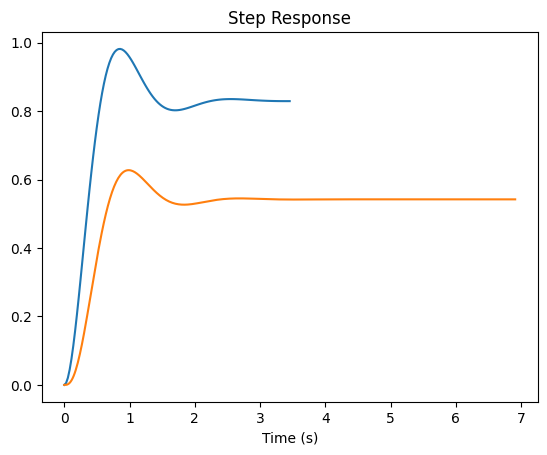

In [6]:
t1,y1 = ct.step_response(T1)
t2,y2 = ct.step_response(T2)
fig,ax = plt.subplots(1)
ax.plot(t1,y1)
ax.plot(t2,y2)
ax.set_title('Step Response')
ax.set_xlabel('Time (s)')

With just my best estimation, it does appear that both designs meet the settling time requirement of 2 seconds